# PHYS-F303 : Projet Monte-Carlo 
# Saerens Henri et Musibau Solomon

## ** INTRODUCTION**

Dans ce travail, nous allons nous intéresser à des phénomènes en rapport avec la Physique statistique. Dans un premier temps on va s'intéresser aux générateurs de nombres aléatoires avec le langage Python. Ensuite nous allons traiter des équations stochastiques pour le mouvement Brownien afin de décrire diffusion de particules dans un fluide. Finalement, on s'intéressera à la transition ferromagnétique/paramagnétique à partir du modèle d'Ising à deux dimensions. 

# **Nombres aléatoires**

Avant de discuter du mouvement Brownien et du modèle d'Ising, il est nécessaire d'introduire les notions de générateurs de nombres aléatoires sur Python. En effet, ces derniers processus se basent principalement sur des conceptes probabilistes. 

Téléchargons en premier lieu les outils nécessaires pour la suite du travail :

In [1]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Pour commencer, on sait que Python a déjà plusieurs générateurs pré-construits de nombres aléatoires. Une fonction connue qui permet de générer des nombres aléatoires est la fonction *random.random_sample()*. Celle-ci génère des nombres aléatoires $x \in [0,1[$ de manière uniforme.

In [2]:
x = numpy.random.random_sample()
print(x)

0.3476515840823685


En ré-excécutant la case ci-dessus plusieurs fois de suite, on observe bien que la fonction nous donne à chaque fois une valeur différente.

Cependant, ces nombres générés ne sont pas réellement aléatoires, ils suivent une certaine séquence de nombres pré-configurée. Il existe alors la fonction *numpy.random.seed()* qui permet de choisir une position initiale dans cette séquence.

On va maintenant se documenter afin de trouver d'autres fonctions de Python pré-construites qui permettraient aussi de générer des nombres aléatoires. On s'est intéresé à quelques fonctions décrites sur le lien suivant:https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html

Il y a une fonction *random.randn* qui permet de générer des nombres aléatoires qui suivent une loi normale:

In [3]:
n=numpy.random.randn() 
print(n)

-0.511483426253932


La fonction *numpy.random.ranf()* a le même rôle que *random.random.sample()* :

In [4]:
f=numpy.random.ranf()
print(f)

0.5444086007138736


La fonction *random.randint(x,y)* permet de générer un nombre entier aléatoire compris entre x et y non compris :

In [5]:
i=numpy.random.randint(1,7)
print(i)

1


Dans les modules du cours, nous avons vu des méthodes permettant de générer des nombres aléatoires suivant une distribution soit exponentielle, soit gaussienne. Par ailleurs, il existe des fonctions pré-définies par Python qui offrent également la possibilité de générer des nombres aléatoires suivant ces distributions. Nous allons donc comparer les résultats donnés par ces deux méthodes.


## $\bullet$ Distribution exponentielle 

De manière générale, cette distribution est donnée par la fonction suivante :

$$
p(x)=
\begin{cases} 
\alpha e^{-\alpha x} &\mbox{pour } x\geq 0 \\
0 &\mbox{si } x<0
\end{cases} 
$$
où $\alpha$ est le paramètre de taux.

Sa fonction de distribution cumulative est : 

$$
F(x) =
\begin{cases} 
1 - e^{-\alpha x} &\mbox{pour } x\geq 0 \\
0 &\mbox{si } x<0
\end{cases} 
$$ 

On a vu qu'on peut générer des nombres suivant la distribution $p(x)$ à partir de sa fonction cumulative $F(x)$ par la relation suivante : 

$$ Y=F^{-1}(X)$$ où $X$ sont des nombres aléatoires $X \in [0,1[$.

L'implémentation de cette méthode est la suivante : 

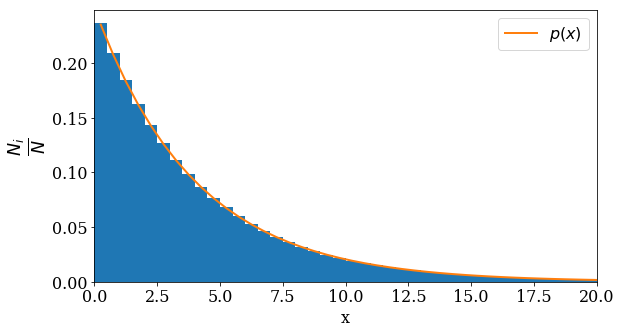

In [6]:
pyplot.figure(figsize=(9,5))
alpha = 0.25                                     #on fixe une valeur de alpha
x = numpy.random.random_sample(5000000)           #Tableau de 5000000 nbr aleatoires
y = -1/alpha*numpy.log(1-x)                      #Y=F(X)^(-1)


#On construit un histogramme pour représenter la distribution
binwidth=0.5
pyplot.xlim(0,20)
bins=numpy.arange(0.,21., binwidth)
pyplot.hist(y,bins,normed=True);

xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=2, label=r'$p(x)$') #On dessine la courbe p(x)
pyplot.xlabel("x")
pyplot.ylabel(r'$\frac{N_{i}}{N}$', fontsize=25)  #N_i est le nombre de nombre aléatoire dans le bins i
                                     #N = 5000000
pyplot.legend()


L'histogramme construit suit bien la courbe théorique de distribution $p(x)$. Notons que l'on pourrait obtenir un histogramme épouserait encore mieux la courbe si l'on augmentait le nombre de valeurs générées et si l'on prenait des "bins" plus fins.

La fonction pré-définie de Python est la suivante : *random.exponential(scale=, size=)* où *scale* correspond à l'inverse de $\alpha$ ($scale=\frac{1}{\alpha}$) et *size* est le nombre de valeurs que l'on veut générer. Voici l'implémentation : 

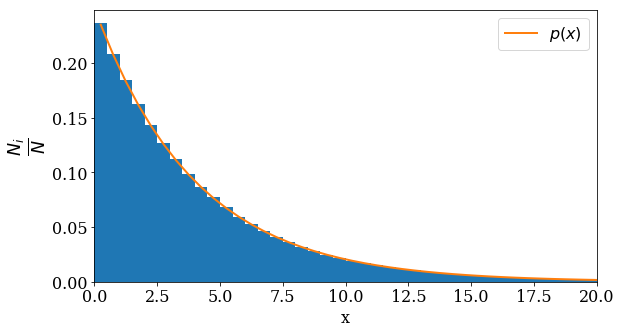

In [7]:
pyplot.figure(figsize=(9,5))
y = numpy.random.exponential(scale=4.0, size=5000000)  #fonction pré-définie exponentielle   
binwidth=0.5
pyplot.xlim(0,20)
bins=numpy.arange(0.,21., binwidth)
pyplot.hist(y,bins,normed=True)

xc = bins[:-1] + binwidth/2
pyplot.plot(xc,0.25*numpy.exp(-0.25*xc), lw=2, label=r'$p(x)$')   
pyplot.xlabel("x")
pyplot.ylabel(r'$\frac{N_{i}}{N}$', fontsize=25)  #N_i est le nombre de nombre aléatoire dans le bins i
                                     #N = 5000000
pyplot.legend()

À nouveau, l'histogramme construit suit bien la courbe théorique. 
On observe que les deux résultats précédents sont assez identiques, on va les représenter l'un à coté de l'autre pour s'en assurer graphiquement:

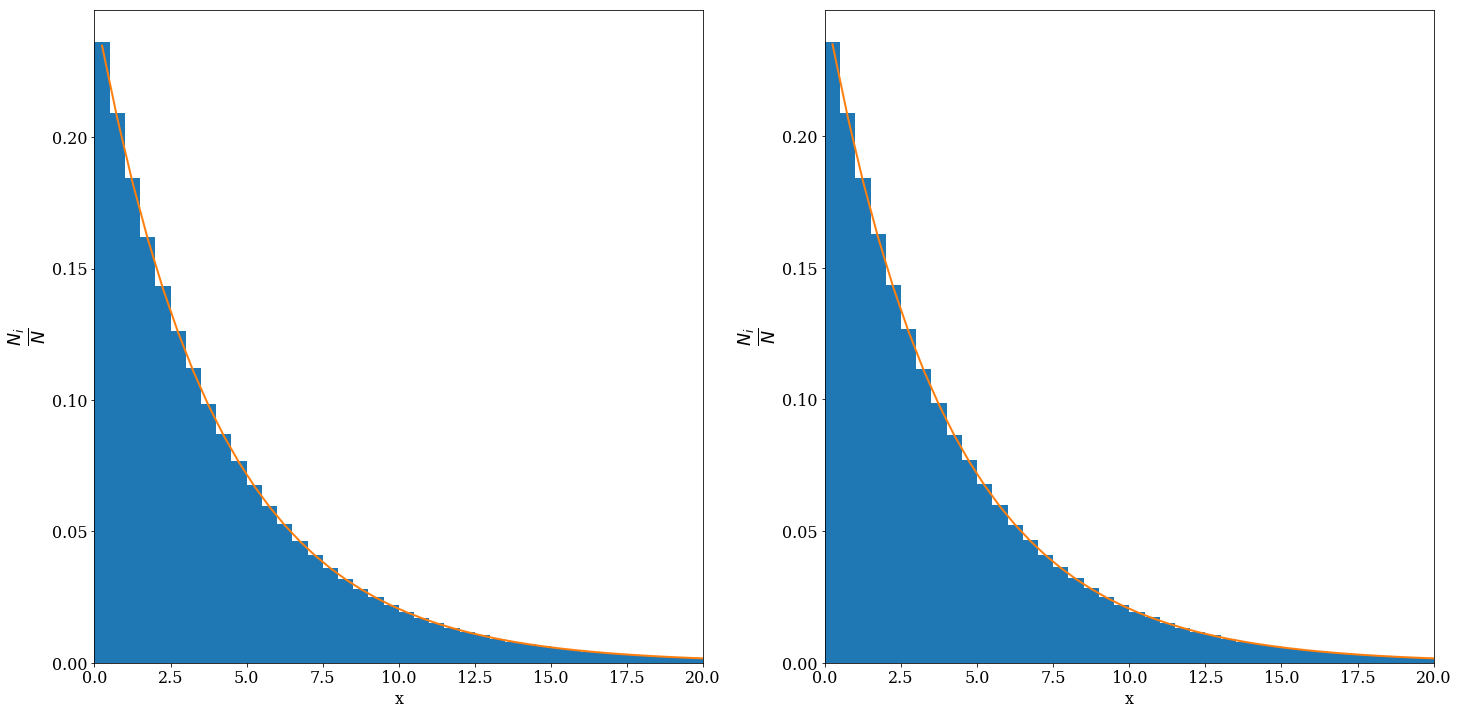

In [8]:
pyplot.figure(figsize=(24,12))
y = numpy.random.exponential(scale=4.0, size=5000000)     
pyplot.subplot(121)
binwidth=0.5
pyplot.xlim(0,20)
bins=numpy.arange(0.,21., binwidth)
pyplot.hist(y,bins,normed=True)
pyplot.xlabel("x")
pyplot.ylabel(r'$\frac{N_{i}}{N}$', fontsize=25)  


xc = bins[:-1] + binwidth/2
pyplot.plot(xc,0.25*numpy.exp(-0.25*xc), lw=2)   


alpha = 0.25 
t = numpy.random.random_sample(5000000)
w = -1/alpha*numpy.log(1-t)  


pyplot.subplot(122)
binwidth=0.5
pyplot.xlim(0,20)
bins=numpy.arange(0.,21., binwidth)
pyplot.hist(w,bins,normed=True);
pyplot.xlabel("x")
pyplot.ylabel(r'$\frac{N_{i}}{N}$', fontsize=25)  

xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=2)   

Les deux méthodes donnent bien des distributions identiques.

## $\bullet$ Distribution gaussienne 

Cette distribution est donnée par la fonction suivante :

$$
p(x)=\frac{1}{\sigma \sqrt{2\pi}} e^{-\frac12 (\frac{x-\mu}{\sigma})^2},
$$
où $\mu$ est la moyenne de la distribution et $\sigma^2$ est la variance.

Pour implémenter cette distribution, on peut se référer à la méthode de réjection de Von Neumann (voir module 6.02) qui utilise la distribution exponentielle. 
Voici son implémentation pour les $x$ positifs : 

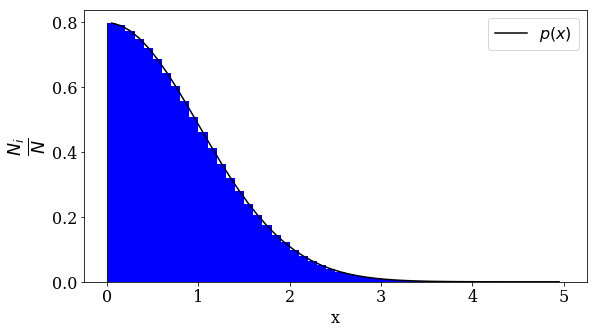

In [9]:
pyplot.figure(figsize=(9,5))

uniform1 = numpy.random.random_sample(5000000)
g = numpy.log(1/(1-uniform1))

p_g_exp = numpy.exp(-g)

p_g_gauss = 2.0*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi)

uniform2 = numpy.random.random_sample(5000000)

condition = uniform2 < p_g_gauss / (1.4*p_g_exp )

h = numpy.extract(condition,g)

binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.hist(h,bins,normed='true',color='blue');

xx = bins[:-1] + binwidth/2
pyplot.plot(xx,2*numpy.exp(-xx**2/2.0)/numpy.sqrt(2*numpy.pi),lw=1.5,color='k', label=r'$p(x)$')
pyplot.xlabel("x")
pyplot.ylabel(r'$\frac{N_{i}}{N}$', fontsize=25)  #N_i est le nombre de nombre aléatoire dans le bins i
                                     #N = 5000000
pyplot.legend()

Comme on pouvait s'y attendre, l'histogramme suit bien la courbe théorique.

La fonction pré-définie de Python est la suivante : *random.normal(x,y,z)* où *x* est la moyenne, *y* est la variance et *z* est le nombre total généré.
Et voici ce qu'on obtient avec la fonction pré-définie de Python:

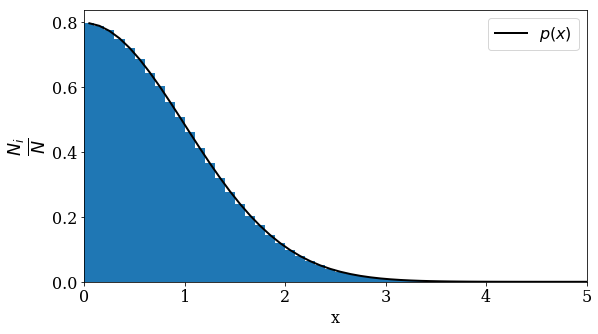

In [10]:
pyplot.figure(figsize=(9,5))
y = numpy.random.normal(0,1,5000000) 
binwidth=0.1
pyplot.xlim(0,5)
bins=numpy.arange(0.,6., binwidth)
pyplot.hist(y,bins,normed=True)

xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi) , lw=2, color='k', label=r'$p(x)$') 
pyplot.xlabel("x")
pyplot.ylabel(r'$\frac{N_{i}}{N}$', fontsize=25)  #N_i est le nombre de nombre aléatoire dans le bins i
                                     #N = 5000000
pyplot.legend()

Ici aussi on observe que les deux méthodes sont relativement identiques, et c'est encore plus visible lorsque les deux histogrammes sont l'un à côté de l'autre:

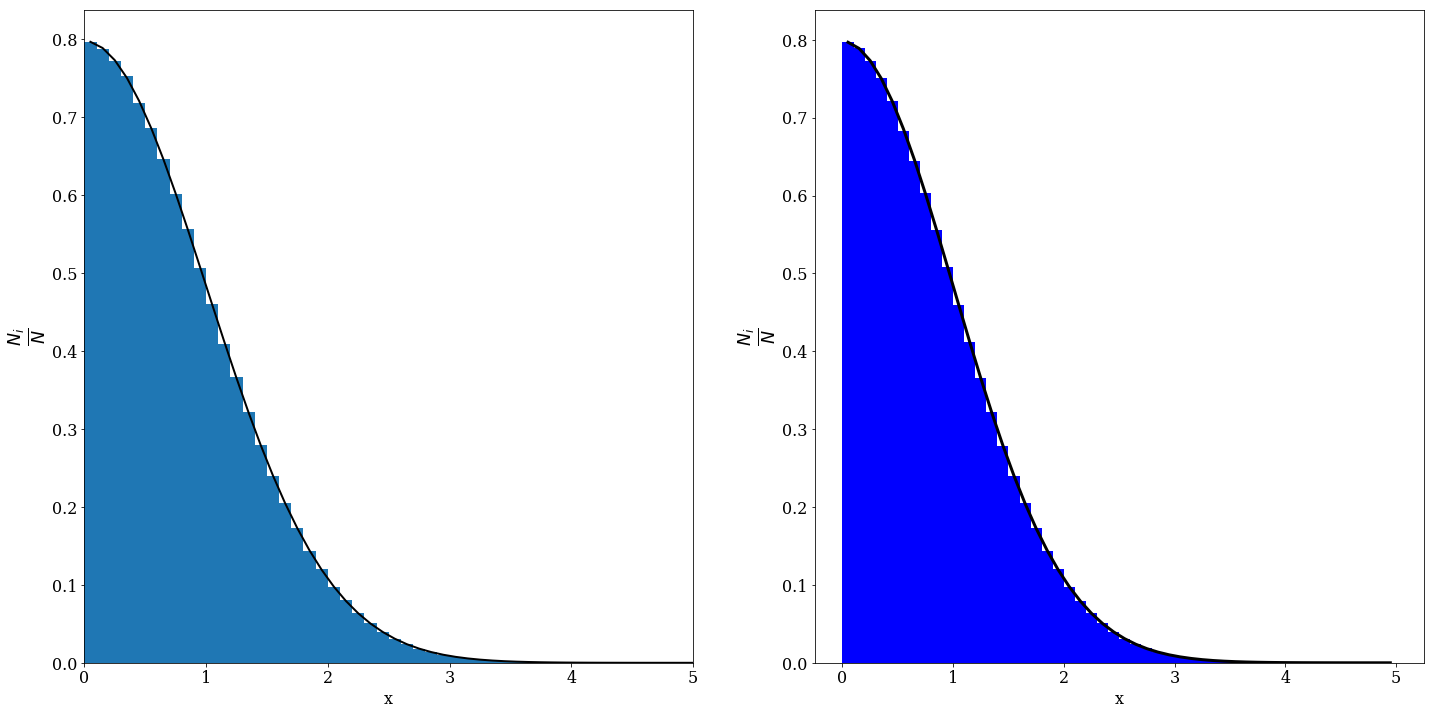

In [11]:
#Avec la fonction prédéfinie internet
pyplot.figure(figsize=(24,12))
y = numpy.random.normal(0,1,5000000)
pyplot.subplot(121)
binwidth=0.1
pyplot.xlim(0,5)
bins=numpy.arange(0.,6., binwidth)
pyplot.hist(y,bins,normed=True)

xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi) , lw=2, color='k')  
pyplot.xlabel("x")
pyplot.ylabel(r'$\frac{N_{i}}{N}$', fontsize=25)  


#Voir cours
pyplot.subplot(122)
# Distribute g according to the exponential distribution
uniform1 = numpy.random.random_sample(5000000)
g = numpy.log(1/(1-uniform1))

# Probabilty of drawing g according to the exponential distribution
p_g_exp = numpy.exp(-g)

# Probability of drawing g according to the (positive) normal distribution
p_g_gauss = 2.0*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi)

# Draw a second uniform distribution for the acceptance
uniform2 = numpy.random.random_sample(5000000)

# Create acceptance mask
condition = uniform2 < p_g_gauss / (1.4*p_g_exp )

# Extract the accepted random numbers
h = numpy.extract(condition,g)

# Plots
binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.hist(h,bins,normed='true',color='blue');
pyplot.xlabel("x")
pyplot.ylabel(r'$\frac{N_{i}}{N}$', fontsize=25)  

# Compute centers of bins
xx = bins[:-1] + binwidth/2
pyplot.plot(xx,2*numpy.exp(-xx**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='k')

A nouveau, on retrouve une concordance entre les deux méthodes. 

## **Algorithme de Box-Muller**

On a alors deux méthodes différentes qui permettent de générer des nombres aléatoires selon une distribution gaussienne ou exponentielle. Cependant, il existe encore une méthode supplémentaire qui permet de générer des nombres aléatoires selont une distribution gaussienne: la méthode de Box-Muller.

Cette méthode consiste à prendre deux distributions de nombres aléatoires de loi uniforme pour générer des paires de nombres aléatoires suivant une loi normale centrée réduite.
Notons $U_1$ et $U_2$ les deux variables aléatoires distribuées uniformément sur l'intervalle $[0,1[$. Avec $U_1$ et $U_2$, on construit deux variables aléatoires $Z_0$ et $Z_1$, qui elles, vont suivre une loi normale centrée réduite grâce aux relations suivante:
$$Z_0=\sqrt{-2lnU_1}cos(2\pi U_2)$$

$$Z_1=\sqrt{-2lnU_1}sin(2\pi U_2) $$

Source : https://fr.wikipedia.org/wiki/M%C3%A9thode_de_Box-Muller

Regardons ce que cela donne en comparaison avec la méthode implémentée plus haut : 

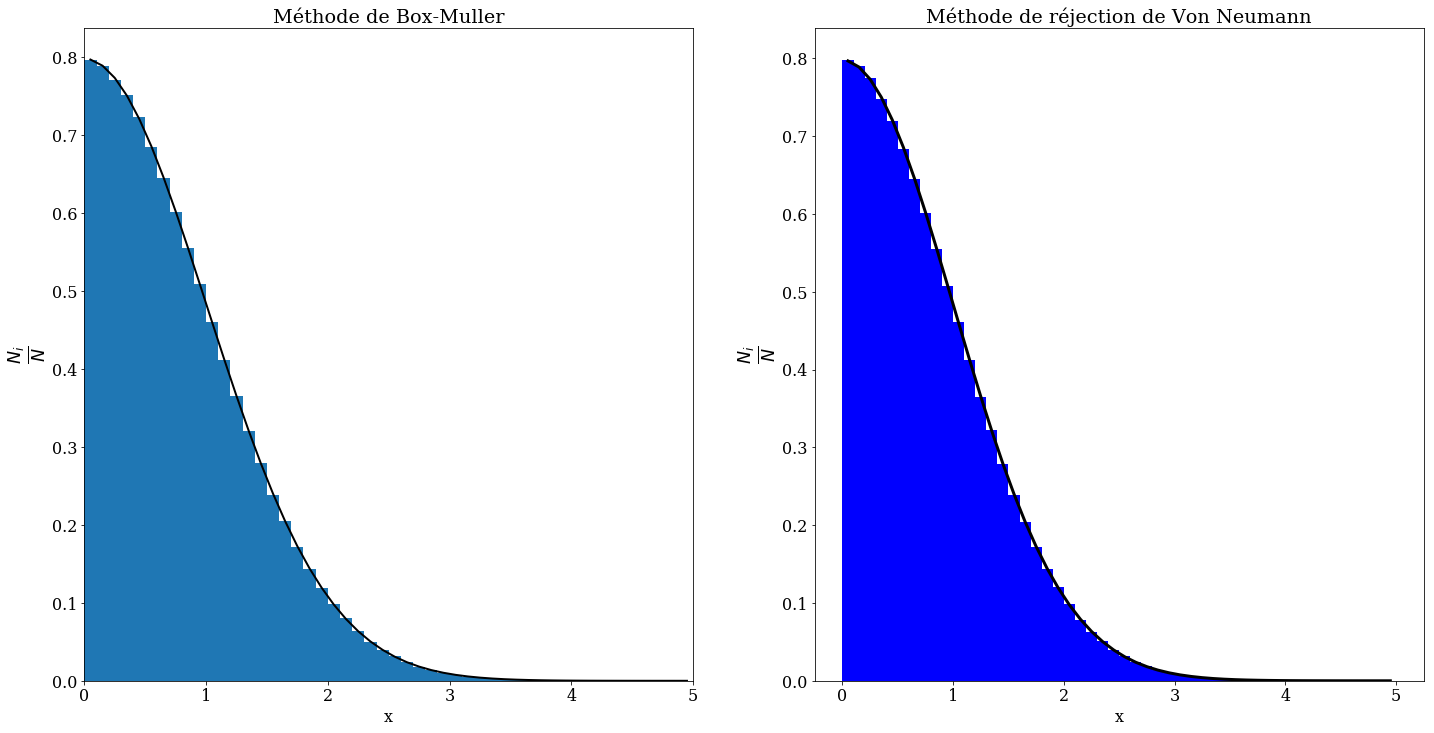

In [12]:
pyplot.figure(figsize=(24,12))
pyplot.subplot(121)
#Méthode de Box-Muller

e1=numpy.random.random_sample(5000000)    
e2=numpy.random.random_sample(5000000)
z0=numpy.sqrt(-2*numpy.log(e1))*numpy.cos(2*numpy.pi*e2)

binwidth=0.1
pyplot.xlim(0,5)
pyplot.hist(z0,bins=numpy.arange(0,6., binwidth),normed=True);

xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi) , lw=2, color='k')  
pyplot.xlabel("x")
pyplot.ylabel(r'$\frac{N_{i}}{N}$', fontsize=25) 
pyplot.title('Méthode de Box-Muller')



#Méthode du module
pyplot.subplot(122)
uniform1 = numpy.random.random_sample(5000000)
g = numpy.log(1/(1-uniform1))
p_g_exp = numpy.exp(-g)
p_g_gauss = 2.0*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi)
uniform2 = numpy.random.random_sample(5000000)
condition = uniform2 < p_g_gauss / (1.4*p_g_exp )
h = numpy.extract(condition,g)

binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.hist(h,bins,normed='true',color='blue');

xx = bins[:-1] + binwidth/2
pyplot.plot(xx,2*numpy.exp(-xx**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='k')
pyplot.xlabel("x")
pyplot.ylabel(r'$\frac{N_{i}}{N}$', fontsize=25)  
pyplot.title('Méthode de réjection de Von Neumann')

On voit bien que cette méthode permet de générer une distribution normale comme attendu.

### **Conclusion** 

Nous avons vu dans cette partie qu'il était possible de facilement générer des nombres aléatoires avec Python, ce qui nous sera fort utile dans la suite du travail. De plus, nous nous somme assuré que les méthodes généraient bien des nombres selon leur lois respectives. 

# ** Mouvement Brownien**


On peut s'intéresser à un problème un peu plus physique, qui est le mouvement Brownien et la diffusion d'une goutte d'encre dans un verre d'eau par exemple.

Prenons donc une verre d'eau, et introduisons dans celui-ci une goutte d'encre. On remarque que la goutte va se diffuser dans le verre, ce qui veut dire que les molécules composant la goutte se sont dispersées. Ceci est régi par l'équation de diffusion suivante:


$$
\frac{\partial \rho}{\partial t}=\alpha \frac{\partial^2 \rho}{\partial x^2}.
$$


Ce phénomène est également décrit par le mouvemement Brownien (ou modèle de marche aléatoire). Selon ce modèle, en une dimension, l'évolution de la position d'une molécule dans l'eau est donnée par:


$$dx=x(t+dt)-x(t)=ds $$ 


où $ds$ est le déplacement d'une molécule qui est dû aux collisions avec les molécules d'eau pendant un temps infinitésimal $dt$ .

Pour estimer l'évolution de la goutte, on va s'intéresser à l'évolution de la densité $\rho(x,t)$. On va modéliser $ds$ comme étant $dx=ds=\sqrt{2\alpha dt}\cal{N(0,1)}$. De plus, supposons qu'initialement, les molécules soient distribuées selont la distribution suivante:


$$
P(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$ 


où $\sigma^2$ est la variance des positions et $\mu$ leur moyenne.
On a donc $\rho(x,0)=P(x)$. Dans ce cas, la solution de l'équation de diffusion ci-dessus est:


$$
\rho(x,t)=\frac{1}{\sqrt{2\pi\sigma_t^2}}e^{-\frac{(x-\mu)^2}{2\sigma_t^2}}
$$


où $\sigma^2_t = 2\alpha t + \sigma^2$.

Ceci correspond à un étallement de la distribution gaussienne initiale dû à l'augmentation de $\sigma^2_t$, mais la moyenne de celle-ci reste inchangée.

On a donc une première modélisation du phénomène de diffusion avec $dx=ds=\sqrt{2\alpha dt}\cal{N(0,1)}$. 

Maintenant, regardons ce qu'il se passe si nous apportons quelques modifications à ce déplacement $dx$.



$\bullet$ Dans un premier cas, on regarde le changement suivant:

$$
dx=cdt+\sqrt{2\alpha dt}\cal{N(0,1)}
$$
où $c$ est une constante.

Toujours en partant des mêmes conditions initiales, nous allons étudier la répartition spatiale des particules à un temps $T$ donné. Ecrivons le code à présent : 

In [13]:
# On génère 100000 particules et leur position initiale suivant une distribution normale centrée en 0
npart=100000
sigma = 1.0
x0 = numpy.random.normal(loc=0,scale=sigma,size=npart) #moyenne =0, ecart-type=1

Calculons les trajectoires des particules considérées et représentons celles-ci pour 20 d'entre-elles afin d'avoir un premier apercu de l'évolution. 

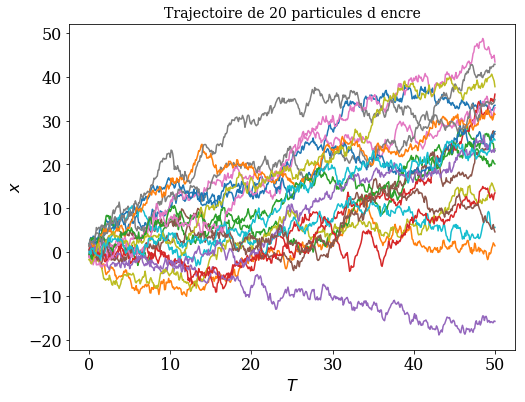

In [14]:
T=50.                            #on regarde l'évolution sur un temps T=50
nt=500                           #nombre d'étapes de discrétisation
dt=T/nt                          #longueur d'intervalle de discrétisation
alpha=2.0
c=0.5
t = numpy.arange(0,T+dt,dt)      
x = numpy.empty([nt+1,npart])    #matrice de 501 lignes (de temps) et 100000 colonnes (positions )

x[0]=x0                          #1ere ligne : distribution initiale

for i in range(nt):
    x[i+1]=x[i]+ c*dt + numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)

fig,ax = pyplot.subplots(figsize=(8,6))
pyplot.xlabel(r'$T$')
pyplot.ylabel(r'$x$') 
pyplot.title('Trajectoire de 20 particules d encre', fontsize=14)
for i in range(20):
    pyplot.plot(t,x[:,i])  #on montre les trajectoires en temps pour les 20 1ère particules
    

A partir de ce graphique, on ne peut rien dire de très précis quantitativement, cependant on peut déjà observer que l'on a, comme précédemment, un étalement des trajectoires, on a bien diffusion des particules. On remarque également que la moyenne a l'air de s'être déplacée vers des valeurs de $x$ positives. On peut se douter que cette translation de la moyenne provient du terme $cdt$, et nous allons étudier cela plus précisémment.

Ci-dessus, nous ne nous sommes intéressé seulement à 20 particules, mais représentons maintenant l'histogramme normalisé des positions pour nos 100000 particules:

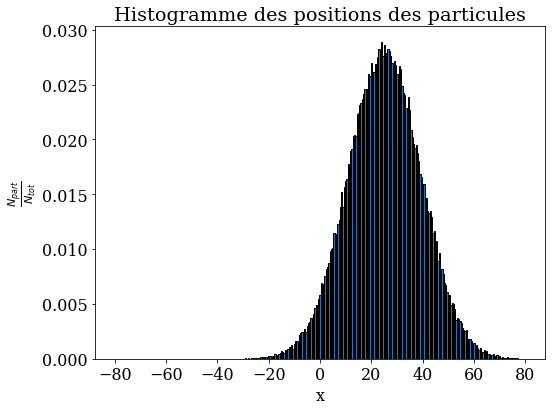

In [15]:
binwidth=0.5
bins=numpy.arange(-80,80,binwidth)
bins = bins + binwidth/2

bin_centers = bins[:-1]+binwidth/2

fig,ax = pyplot.subplots(figsize=(8,6))
pyplot.hist(x[nt],bins,normed=True, ec='black');    #Positions des particules au temps T=50

ax.set_xlabel("x")
ax.set_ylabel(r'$\frac{N_{part}}{N_{tot}}$')        #N_part : nbr de particules dans le bins associé
ax.set_title(r'Histogramme des positions des particules')
pyplot.tight_layout()

On observe bien qu'il y a eu diffusion de nos particules et que notre histogramme a toujours la forme d'une gaussienne avec la même variance. De plus, on a effectivement une translation de notre distribution gaussienne initiale vers les $x$ positifs. 
Nous voudrions à présent déterminer l'équation gouvernant l'évolution de la densité dans ce cas précis. 


On peut faire une première observation sur la moyenne de notre histogramme:

In [16]:
#Il existe une fct prédéfinie qui calcule la moyenne d'un tableau de valeurs : 
moyenne=numpy.mean(x[-1])
print(moyenne)

25.0294431862


On remarque que cette moyenne correspond à $25=50\times 0.5$ et donc à $\mu(T)=T \times c$. On peut donc interpréter cette constante $c$ comme étant une vitesse de groupe du paquet gaussien. 

On remarque que la solution gaussienne obtenue a exactement la même forme que la précedente, mais qu'elle fait intervenir un changement de variable $\Rightarrow$ à la place de la variable $x$ $\rightarrow$ $y- ct$. 
Donc les changement de variables sont : 

\begin{cases}y &= x + ct \\
\tau &= t
\end{cases}

En effectuant la règle de dérivation en chaine, on obtient : 

\begin{cases}\frac{\partial \rho}{\partial x} &= \frac{\partial \rho}{\partial y} \frac{\partial y}{\partial x} + \frac{\partial \rho}{\partial \tau} \frac{\partial \tau}{\partial x}&= \frac{\partial \rho}{\partial y}\\
\frac{\partial \rho}{\partial t} &= \frac{\partial \rho}{\partial y}\frac{\partial y}{\partial t} + \frac{\partial \rho}{\partial \tau}\frac{\partial \tau}{\partial t}&= c.\frac{\partial \rho}{\partial y} + \frac{\partial \rho}{\partial \tau} 
\end{cases}



l'équation gouvernant l'évolution de la densité : 
\begin{equation}
c \frac{\partial\rho}{\partial x} + \frac{\partial\rho}{\partial t} = \alpha \frac{\partial^2 \rho}{\partial x^2}
\end{equation}

La solution analytique étant : $$
\rho(x,t)=\frac{1}{\sqrt{2\pi\sigma_t^2}}e^{-\frac{(x- ct -\mu)^2}{2\sigma_t^2}}
$$ 
avec  $$\sigma^2_t = 2\alpha t + \sigma^2$$

En injectant la solution dans l'équation établie précédemment, on voit que c'est la bonne équation.  

Maintenant, sur l'histogramme ci-dessous, nous avons affiché la Gaussienne correspondant à l'équation ci-dessus, et on remarque qu'elle épouse presque parfaitement l'histogramme. Ceci confirme la solution que nous avons obtenu : 

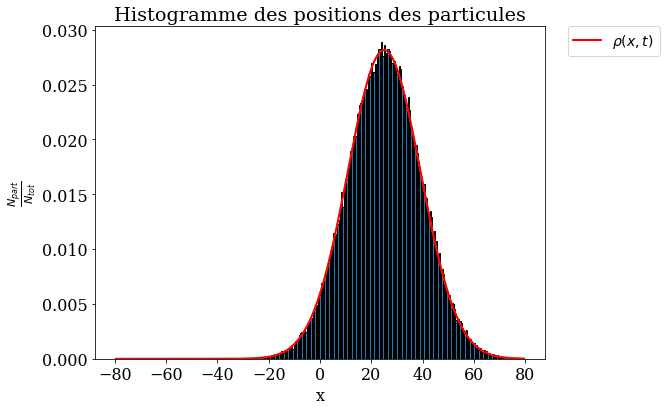

In [17]:
fig,ax = pyplot.subplots(figsize=(8,6))
pyplot.hist(x[nt],bins,normed=True, ec='black');    

#On affiche notre solution présumée rho(x,t) pour un temps T=50
sigmat2=2*alpha*T+sigma**2     
pyplot.plot(bin_centers, numpy.exp(-(bin_centers - c*T )**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2))
ax.plot(bin_centers, numpy.exp(-(bin_centers - c*T )**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2), lw =2, color="red" , label=r"$\rho(x,t)$")
ax.set_xlabel("x")
ax.set_ylabel(r'$\frac{N_{part}}{N_{tot}}$')
ax.set_title(r'Histogramme des positions des particules')
pyplot.legend(fontsize=14, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pyplot.tight_layout()

$\bullet$ Que se passe-t-il si, à la place d'introduire le terme $cdt$ dans la modélisation de $dx$, on introduisait un terme de "friction" $-\gamma x dt$ ?


$$
dx=-\gamma x dt + \sqrt{2\alpha dt}\cal{N(0,1)}
$$

On garde le même nombre de particules et on prend les mêmes conditions initiales pour la distribution spatiale des particules.

In [18]:
npart=100000
sigma = 1.0
x0 = numpy.random.normal(loc=0,scale=sigma,size=npart) 

Calculons les trajectoires des particules jusqu'à un temps $T$ : 

In [19]:
T=20.
nt=500
dt=T/nt
alpha=10.
gamma=0.5

t = numpy.arange(0,T+dt,dt)
x2 = numpy.empty([nt+1,npart])    
x2[0]=x0   

for i in range(nt):
    x2[i+1]=x2[i] -gamma*x2[i]*dt + numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)

Comme pour le cas précédent, on représente les trajectoires de 20 particules pour avoir un appercu de ce qu'il se passe : 

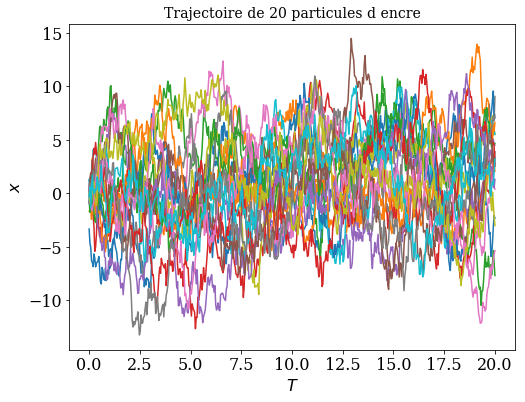

In [20]:
fig,ax = pyplot.subplots(figsize=(8,6))
pyplot.xlabel(r'$T$')
pyplot.ylabel(r'$x$') 
pyplot.title('Trajectoire de 20 particules d encre', fontsize=14)
for i in range(20):
    pyplot.plot(t,x2[:,i])  

Dans ce cas-ci aussi on observe bien une dispersion des trajectoires, mais contrairement au cas précédent, il n'y a pas l'air d'avoir eu de translation de la distribution gaussienne initiale. Regardons plus précisément l'histogramme qui tient compte de la position finale de chacune des particules : 

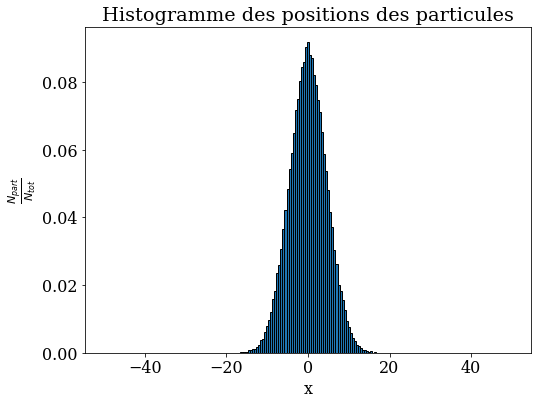

In [21]:
binwidth2=0.5
bins2=numpy.arange(-50,50,binwidth2)
bins2 = bins2 + binwidth2/2
bin_centers2 = bins2[:-1]+binwidth2/2

fig,ax = pyplot.subplots(figsize=(8,6))
pyplot.hist(x2[nt],bins2,normed=True, ec='black');    
ax.set_xlabel("x")
ax.set_ylabel(r'$\frac{N_{part}}{N_{tot}}$')
ax.set_title(r'Histogramme des positions des particules')


L'histogramme confirme bien les observations précédentes : on a une diffusion des particules, sans pour autant avoir une translation de la distribution gaussienne, la moyenne reste bien approximativement nulle :

In [22]:
#On vérifie que la moyenne reste bien nulle
moyenne2=numpy.mean(x2[-1])
print(moyenne2)

-0.023867037584


La moyenne n'est en fait pas exactement nulle ici, et cela peut se comprendre par le fait qu'on a un processus aléatoire, il faudrait prendre un nombre plus grand de particules pour tendre vers la valeur exacte de la moyenne.

On peut également remarquer que si on évalue notre algorithme pour un temps plus long, l'histogramme que l'on voit ci-dessus va tendre vers une forme stationnaire dont la variance $\sigma_*^2$ vaut environ $\sigma_*^2=\frac{\alpha}{\gamma}$

Dans la suite, nous n'allons pas nous consacrer à un dévellopement analytique de l'équation d'évolution de la densité. Par contre, nous allons tenter de déterminer comment évolue la variance $\sigma_t^2$ de la distribution en position des particules en fonction des paramètres $\alpha$,$\gamma$ et $t$. Pour cela, on va à chaque fois fixer deux de ces paramètres, et faire varier le troisième afin de voir leur influence sur $\sigma_t^2$.

Dans un premier temps, on va fixer T=1 et $\gamma=0.05$ et faire varier $\alpha$. On calcule ensuite la variance de chaque histogramme obtenu au moyen de la fonction pré-définie de Python *numpy.var()*.


(0, 120)

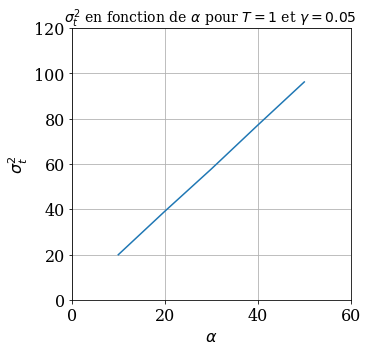

In [23]:
alpha1_005=numpy.array([10,20,30,40,50])                     #alpha considérés
variance1_005=numpy.array([19.9,39.065,57.736,77.113,96.185])#variances calculées

#On affiche le comportement de la variance en fonction de alpha
pyplot.figure(figsize=(5,5))
pyplot.grid(True)
pyplot.xlabel(r'$\alpha$')
pyplot.ylabel(r'$\sigma_t^2$') 
pyplot.title(r'$\sigma_t^2$ en fonction de $\alpha$ pour $T=1$ et $\gamma=0.05$ ', fontsize=14)
pyplot.plot(alpha1_005, variance1_005)
pyplot.xlim(0,60)  
pyplot.ylim(0,120)

**Observations** : Pour les valeurs choisies dans ce cas-ci, on observe une dépendance linéaire de $\sigma_t^2$ en $\alpha$.

Fixons $T=150$ et $\alpha=10$, et regadons la dépendance en $\gamma$:

(0, 201)

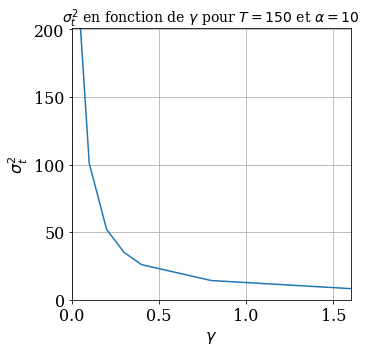

In [24]:
gamma150_10=numpy.array([0.05,0.1,0.2,0.3,0.4, 0.8, 1.6])   #gamma considérés
variance150_10=numpy.array([201,101,52,35.05,26,14.24,8.27])

pyplot.figure(figsize=(5,5))
pyplot.grid(True)
pyplot.xlabel(r'$\gamma$')
pyplot.ylabel(r'$\sigma_t^2$') 
pyplot.title(r'$\sigma_t^2$ en fonction de $\gamma$ pour $T=150$ et $\alpha=10$ ', fontsize=14)
pyplot.plot(gamma150_10, variance150_10)
pyplot.xlim(0,1.6)  
pyplot.ylim(0,201)

**Observations** : On ovserve un comportement qui pourrait ressembler à une dépendance en $\frac{1}{\gamma}$.

On fixe maintenant $\alpha=10$, $\gamma=0.05$ et on fait varier T:

(19, 205)

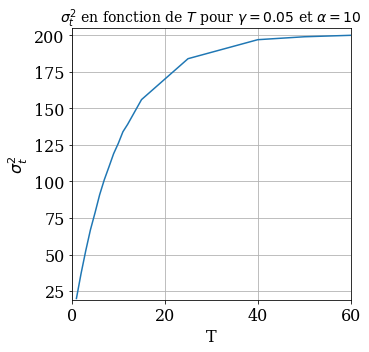

In [25]:
T10_005=numpy.array([1,2,3,4,5,6,7,8,9,10,11,12,15,25,40,50,60]) #temps considérés
variance10_005=numpy.array([19.9,37.01,52.51,66.74,78.55,90.97,101.22,110,119,126,134,139,156,184,197,199,200])

pyplot.figure(figsize=(5,5))
pyplot.grid(True)
pyplot.xlabel(r'T')
pyplot.ylabel(r'$\sigma_t^2$') 
pyplot.title(r'$\sigma_t^2$ en fonction de $T$ pour $\gamma=0.05$ et $\alpha=10$ ', fontsize=14)
pyplot.plot(T10_005, variance10_005)
pyplot.xlim(0,60)  
pyplot.ylim(19,205)

**Observations** : Sur ce graphique, on voit bien que $\sigma_t^2$ croît avec le temps et atteint une valeur stationnaire $\sigma_*^2\approx200$, ce qui correspond à $\frac{\alpha}{\gamma}$. De plus, cette valeur stationnaire est attiente lorsque $\gamma T\approx2,5$.

Avant de proposer une relation qui pourrait correspondre pour $\sigma_t^2$, on va d'abord faire une analyse dimensionnelle des différentes variables du problèmes.
Puisqu'on considère le problème en une dimension, $\rho(x,t)$ correspond à la densité de particules par unité de longueur $\Rightarrow [\rho]=m^{-1}$.
On sait aussi que puisque $\rho$ suit une distribution gaussienne, et donc $\rho \propto \sigma^{-1}$, ce qui implique que $[\sigma]=m$.
Ensuite, dans un des cas précédents, on avait la relation $\sigma_t^2=2\alpha t+\sigma^2$, on doit donc avoir $[\sigma_t^2]=[\alpha \, t]$, c'est-à-dire que $[\alpha]=\frac{m^2}{s}$ puisque $[t]=s$. Finalement, dans ce cas-ci, on a $dx=-\gamma x dt + \sqrt{2\alpha dt}\cal{N(0,1)}$, on doit donc avoir $[dx]=[\gamma \, x \, dt]$ $\Rightarrow [\gamma]=\frac{1}{s}$.

En tenant compte de cette analyse dimensionnelle et des résultats ci-dessus pour les comportements de $\sigma_t^2$, on peut supposer que $\sigma_t^2$ obéit à la relation suivante:
$$
\sigma_t^2=\frac{\alpha}{\gamma}tanh(\sqrt{\gamma t})+\sigma^2
$$
On choisit la fonction "tanh(x)" car elle croissante sur l'intervalle $[0,+\infty[$ et qu'elle devient stationnaire à partir de $x=2.5$ environ, ce qui pourrait correspondre à ce qu'on a observé ci-dessus.
Observons ce que cela donne si on représente sur notre histogramme une distribution gaussienne avec une telle variance :

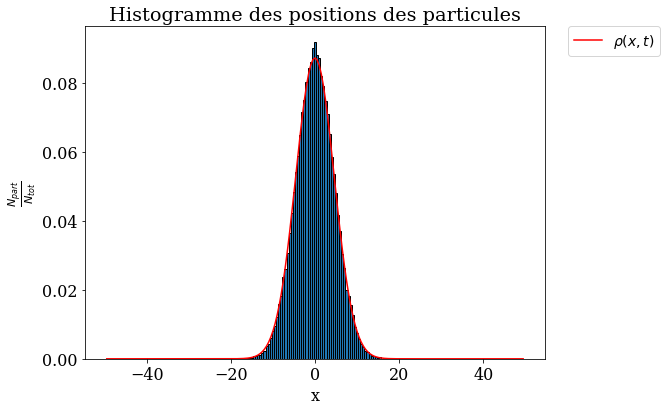

In [26]:
binwidth3=0.5
bins3=numpy.arange(-50,50,binwidth3)
bins3 = bins3 + binwidth3/2

bin_centers3 = bins3[:-1]+binwidth3/2

fig,ax = pyplot.subplots(figsize=(8,6))
pyplot.hist(x2[nt],bins3,normed=True, ec='black');    

#Graphique de la variance présumée
sigmat2=(alpha/gamma)*numpy.tanh(numpy.sqrt(gamma*T))+sigma**2  
pyplot.plot(bin_centers3, numpy.exp(-bin_centers3**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2), color='red', label=r'$\rho(x,t)$')
ax.set_xlabel("x")
ax.set_ylabel(r'$\frac{N_{part}}{N_{tot}}$')
ax.set_title(r'Histogramme des positions des particules')
pyplot.legend(fontsize=14, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pyplot.tight_layout()

On observe que la que la courbe rouge suit assez bien les contours de notre histogramme, ce qui est plutot positif. 

Cependant, on a remarqué que lorsque le produit $\gamma\times t$ devient trop petit (par exemple $\gamma\times t=0,05$) alors ceci n'est plus vraiment correcte. Ceci indique que la formule que l'on propose ci-dessus n'est pas correcte pour décrire l'évolution de la variance $\sigma_t^2$, mais c'est la meilleure qu'on a pu trouver. 

# **Modèle d'Ising**

Dans cette dernière partie, nous étudions la transition de phase paramagnétique/ferromagnétique pour un système de spins grâce au modèle d'Ising. En dessous d'une certaine température critique $T_c$, un matériau peut être dans l'état ferromagnétique : tous ses spins sont orientés dans la même direction et le matériau possède une aimantation permanente même en l'absence d'un champ magnétique externe. Au dessus de cette température critique il est dit paramagnétique : les spins sont orientés de facon complètement aléatoire et l'objet possède donc une magnétisation moyenne nulle. 

Nous allons étudier le modèle d'Ising 2D dans lequel le matériau fictif est composé de dipôles magnétiques disposés de facon régulière et isotrope dans un réseau 2D périodique dans les deux directions. Dans ce modèle, on suppose les dipôles interagissent uniquement avec leurs plus proches voisins (4 au total) et l'énergie totale du réseau de spins est donnée par : 

$$E=-\alpha \sum_{pairs(i,j)} s_i s_j$$ où $s_i$ est le spin (up ou down) du $i^{ème}$ dipôle et $\alpha = \frac{J}{k_B T}$ est un paramètre sans unité tenant compte de la constante de couplage $J$ entre spins et de la température du matériau $T$. On utilise le paramètre $\alpha$ au lieu de $J$ pour adimensionner l'équation. 

Le but est de pouvoir calculer des variables du système telles que l'énergie moyenne $<E>$ et la magnétisation moyenne $<M>$ pour une température donnée. Théoriquement, il est possible d'obtenir ces valeurs en utilisant les lois de la Physique statistique mais il n'est pas possible d'implémenter ces méthodes qui demandent d'évaluer des quantités sur tous les états possibles du système, ce qui représente biensûr un nombre trop élevé de calculs. Une alternative est d'utiliser *l'Algorithme de Metropolis* (voir module 6.04) qui permet d'obtenir ces mêmes quantités et qui converge vers la même solution qui serait établie par les formules de la Physique statistique. 

$\bullet$ Nous allons tester à présent le bon fonctionnement de cet algorithme en veillant à ce qu'il donne la bonne probabilité d'avoir des spins *ups* par rapport aux spins *downs* pour différentes configurations de réseaux. 

En premier lieu, nous utilisons une fonction qui nous permet de générer un réseau de spins orientés aléatoirement (réseau de taille $n_x \times n_y$) :

In [27]:
def initial_state(nx,ny):
       
    r = numpy.random.randint(0,2,(nx,ny))    #matrice (nx,ny) de nombres aléatoires == soit 0, soit 1
    
    r[r==0] =-1                              #quand r==0, on assigne un spin down (négatif)

    return r                                 #retourne le réseau de spins aléatoire

On initialise nos paramètres : 

In [28]:
nx=10
ny=10
alpha = 0.1  #constante de couplage sans dimension J/(kb*T)

On peut calculer la contribution à l'énergie totale du réseau pour un spin "sigma" de coordonnées (ix,iy) via la fonction suivante : 

In [29]:
#sp : matrice de spin (nx,ny)
def energy_at_site(sp,alpha,sigma, ix,iy):
    
    energy = -alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])

    #les pourcentages (%) sont les "modulos" pour tenir compte des conditions périodiques du réseau
    return energy

A présent, nous définissons la fonction qui implémente l'algorithme de Metropolis et qui permet d'inverser le dipôle choisit (échanger le spin choisit de *up* à *down* ou inversément) si la condition de probabilité est remplie : 

In [30]:
def metropolis_at_site(sp,alpha,ix,iy):
    sigma=sp[ix,iy]
    energy_before_flip = energy_at_site(sp,alpha,sigma, ix,iy)
    sigma= - sigma
    energy_if_site_flipped = energy_at_site(sp,alpha,sigma, ix,iy)
    
    # On 'switch' le dipole avec la probabilité de Metropolis
    # La condition est toujours satisfaite si dE < 0
    if (numpy.random.random_sample() < numpy.exp(-(energy_if_site_flipped -energy_before_flip))):
        
        sp[ix,iy]=-sp[ix,iy]      #On 'switch' le dipole concerné si la condition est acceptée

La probabilité relative d'avoir un spin *down* par rapport à un spin *up* peut être calculée à partir du spin donné *sigma* via la formule suivante :

$$\frac{p({\rm downs})}{p({\rm up})} = e^{-\Delta E}$$

In [31]:
def probrelative(sp, alpha, sigma, ix, iy):
    
    p = numpy.exp(-(energy_at_site(sp,alpha,-sigma, ix,iy)- energy_at_site(sp,alpha,sigma, ix,iy)))
    
    return p

Finalement nous allons comparer les valeurs données par l'algorithme $(1)$ avec la formule précentente $(2)$ : 

In [32]:
#(1)
#On génère une séquence d'états avec Metropolis et on calcule le ratio ups/downs
ix=5                                         #coordonnées du spin choisit  
iy=5
sp = initial_state(nx,ny) 

NMC = 100000                                 #nombre d'états que l'on génère avec l'algorithme
states = numpy.empty(NMC+1)                  #séquence d'états        
states[0]=sp[ix,iy]

for n in range(0,NMC):
    metropolis_at_site(sp,alpha,ix,iy)       #Switch le spin si la condition est remplie
    states[n]=sp[ix,iy]                      
ups = numpy.extract(states==1, states).size  #Extraire tous les états ups et prendre la taille 
downs = NMC - ups
print('Le ratio ups/downs =', ups/downs)

Le ratio ups/downs = 1.0


In [33]:
#(2)
sigma=sp[ix,iy]
probr = probrelative(sp, alpha, sigma , ix, iy)
probr=1/probr
print('Le ratio ups/downs =', probr)

Le ratio ups/downs = 1.0


En évaluant les cellules $(1)$ et $(2)$ plusieurs fois, et donc en utilisant plusieurs conditions initiales de réseaux grâce à la fonction *initial_state*, on peut observer une bonne concordance entre les valeurs de probabilité relative *ups/downs*. L'algorithme de Metropolis converge bien vers la bonne proportion *up/down* attendue, d'autant plus que le nombre d'états générés est grand. 

**Remarque** : On peut aussi remarquer que, certaines fois, les cellules $(1)$ et $(2)$ ne donnent pas les mêmes valeurs, mais des valeurs qui sont inversément proportionnelles (par exemple $1.49$ et $\frac{1}{1.49}=0.67$). Ceci est peut-être dû au fait que lorsqu'on prend la fonction (2), on ne tient compte que d'un seul spin tandis que pour la fonction (1), on évalue l'algorithme de Métropolis plusieurs fois sur le même spin.

## **Détermination du paramètre critique $\alpha_c$**

Grâce à l'algorithme de Metropolis, nous pouvons à présent montrer qu'un matériau ferromagnétique subit une transition de phase à une certaine température critique $T_c$, c'est-à-dire à une certaine constante de couplage critique $\alpha_c = \frac{J}{k_B T_c}$. Le principe est de porter le réseau de spins à différentes températures, de le laisser atteindre l'équilibre thermique à la température donnée puis de mesurer son énergie moyenne et son aimantation moyenne à cette température. 

Pour atteindre l'équilibre thermique, nous aurons besoin d'une fonction générant des séquences d'états ($NMC+1$ réseaux) en essayant de switcher les spins aléatoires du réseau si la condition de Métropolis est satisfaite, et ceci pour toutes les valeurs de $\alpha$ considérées : 

In [34]:
#Creer une séquence d'état pour le modèle d'Ising en utilisant l'algorithme de Metropolis
#alpha : constante de couplage

def ising_model_metropolis(sp, NMC, nx, ny, alpha):
   
    states = numpy.empty([NMC+1,nx,ny])        #tableau à 3D stockant les NMC + 1 états pour un alpha donné
    states[0] = sp.copy()                      #état initial
    
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix=numpy.random.randint(0,nx)      #nombre entier aléatoire entre 0 et nx(non compris)
            iy=numpy.random.randint(0,ny)      #nombre entier aléatoire entre 0 et ny(non compris)
            metropolis_at_site(sp,alpha,ix,iy) #switch le dipole si condition remplie
        states[i]=sp.copy()
    return states

## **1)**

Dans un premier temps, nous allons considérer initialement un matériau ferromagnétique dans lequel tous les spins sont orientés *up*. Le réseau est composé de 10000 dipôles et nous allons générer des séquences d'états pour des valeurs de $\alpha$ comprises entre $0.25$ et $0.55$ car nous voulons une assez grande précision sur la transition et nous savons que la transition de phase se produit dans cet intervalle de valeur de $\alpha$ (ayant préalablement fais le calcul pour une dizaine de valeurs de $\alpha \in [0,1]$)

In [38]:
nbr=10                                     #nombre de constantes de couplage alpha considéré 
alpha = numpy.linspace(0.25,0.55,nbr)       #tableau contenant  nbr alpha régulièrement espacés entre 0.25 et 0.55
nx = 100
ny = 100
sp = numpy.ones([nx,ny])                    #état initial : spins up partout dans le réseau
NMC= 250                                    #NMC états générés avec le modèle d'Ising  
etat = numpy.ones([nbr, NMC + 1, nx, ny])   #tableau 4D stockant les NMC +1 états pour les nbr alpha
for i, alphavaleur in enumerate(alpha):     

    etat[i]= ising_model_metropolis(sp.copy(), NMC, nx, ny, alpha[i])

Pour avoir un premier aperçu des données obtenues, on peut afficher graphiquement l'évolution de la magnétisation totale en fonction des séquences générées et ceci pour chaque valeur de $\alpha$. 

**Remarque** :  la magnétisation totale $M_k$ pour un seul état $k$ s'obtient simplement en sommant tous les spins de ce réseau : $$ M_k =  \sum_{i=1}^{N} \sigma_{i_{k}}$$ où $N$ est le nombre total de spin dans un réseau et $\sigma_{ik}$ les valeurs des spins de ce réseau.

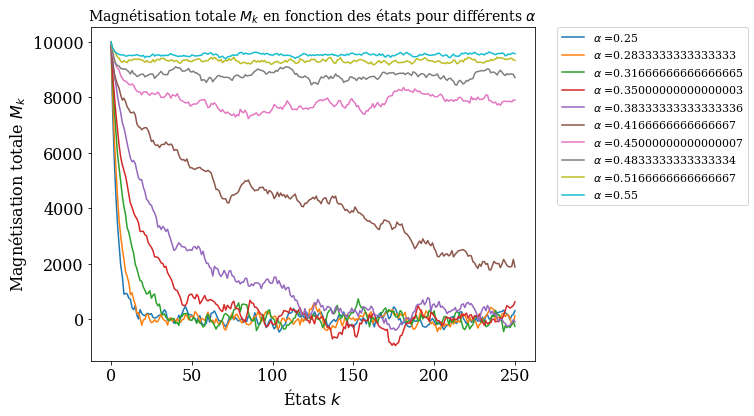

In [39]:
pyplot.figure(figsize=(7.5,5.5))
for i,alphavaleur in enumerate(alpha):
    pyplot.plot(etat[i].sum(axis=(1,2)), label= r'$\alpha$ ={0:1}'.format(alpha[i]))
    
pyplot.legend(fontsize=11, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pyplot.tight_layout()
pyplot.title(r'Magnétisation totale $M_k$ en fonction des états pour différents $\alpha$', fontsize=14)
pyplot.xlabel(r'États $k$')
pyplot.ylabel(r'Magnétisation totale $M_k$')

La première chose que l'on peut observer est que pour des valeurs de $\alpha$ plus petite que 0.4, les états générés par l'algorithme tendent vers des états stationnaires de magnétisation totale nulle. Alors que ce n'est pas le cas pour les autres valeurs de $\alpha$, nous voyons même que pour $\alpha = 0.55$ la magnétisation totale est toujours proche de 10000 (qui est la magnétisation de l'état initial). On apercoit donc un changement drastique dans le comportement du matériau étudié en fonction du paramètre $\alpha$. Tentons à présent d'interpréter le phénomène. 

### $\bullet$ Magnétisation moyenne $<M>$ en fonction de $\alpha$ : 

Nous aimerions tracer un graphique présentant l'évolution de $<M>$ en fonction de $\alpha$. Il nous suffit simplement d'effectuer une somme sur tous les spins ($+1$ ou $-1$) de tous les *NMC+1* réseaux calculés via l'algorithme de Metropolis et d'en déduire la magnétisation moyenne, et ceci également pour chaque $\alpha$ considérés : 

$$<M> = \frac{\sum_k M_k}{N_k}$$ où $N_k = NMC + 1$

**REMARQUE** : Pour calculer la moyenne correctement, nous ne voulons pas que le résultat soit biaisé par les valeurs des magnétisations des premiers états calculés par l'algorithme. Il faut prendre une moyenne lorsque les états atteignent un *état stationnaire d'équilibre thermodynamique*. Donc dans notre code, nous ne tiendrons compte que des 40 derniers états obtenus par l'algorithme et donc $N_k=40$. 

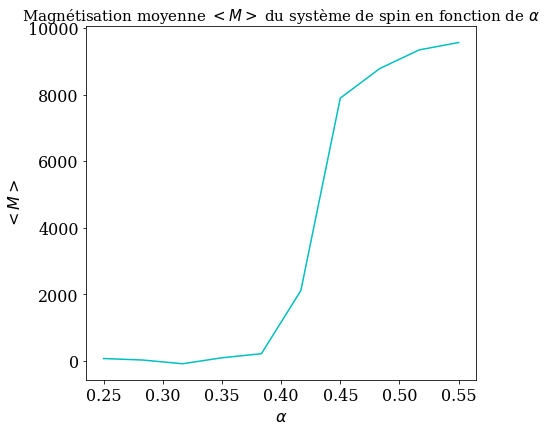

In [42]:
#Calcul de <M> pour chaque alpha et représentation graphique

a = 210                                           #faire la moyenne pour les 40 derniers états
y = numpy.zeros(nbr)                              #tableau qui stocke les moyennes <M>
for i in range(nbr):                              #Calcul de Mk
    for j in range (a,NMC+1):
          y[i] = y[i] + numpy.sum(etat[i,j,:,:])
            
y = y/(NMC + 1 - a)                               #Calcul de <M>

pyplot.figure(figsize=(7,6.5))
pyplot.plot(alpha,y, color='c')
pyplot.title(r'Magnétisation moyenne $<M>$ du système de spin en fonction de $\alpha$', fontsize=15)
pyplot.xlabel(r'$\alpha$')
pyplot.ylabel(r'$<M>$')

Nous voyons une discontinuité dans ce graphique, celle-ci nous indique bien que l'on a une transition de phase paramagnétique/ferromagnétique. En effet, on observe une augmentation brutale de la magnétisation à partir d'une certaine valeur $\alpha$. De facon approximative, on peut déduire une valeur critique de transition $\alpha_c$ au milieu de la pente en additionnant des points $\alpha$ se trouvant sur la pente et en faisant la moyenne : $\alpha_c \approx 0.42$. 

Comme attendu, on voit qu'à haute température (petit $\alpha$) la magnétisation moyenne est nulle, cela correspond au cas paramagnétique dans lequel les spins du matériau sont orientés complètement aléatoirement.
Tandis qu'en dessous de la témpérature critique $T_c$ (lorsque l'on augmente $\alpha$) le matériau acquiert une aimentation très élevée, il devient ferromagnétique et les spins sont pratiquement tous orientés dans la même direction. 

### $\bullet$ Energie moyenne $<E>$ en fonction de $\alpha$ : 

Ici, nous voulons calculer la contribution à l'énergie pour chaque spins de nos *NMC+1* réseaux de spins, et ceci pour tous les $\alpha$ considérés. À cette fin, nous utilisons la fonction *energy_at_site* qui nous permet de calculer la contribution à l'énergie totale de chaque spin. Ensuite, il suffit de faire une moyenne sur l'energie obtenue :

$$<E> = \frac{\sum_k E_k}{N_k}$$

où les $E_k$ sont des énergies totales des $N_k$ réseaux

**Remarque** : Il faut faire attention quand on calcule la contribution à l'énergie $E_k$ pour un réseau . En effet, on sait que 

$$E_k=-\alpha \sum_{pairs(i,j)} s_i s_j$$
Prenons par exemple un réseau de spins *ups* de taille $(3,3)$ : si on ne tient pas compte de la somme qu'entre paires, on aura une énergie $E_k$ $\propto$ $3 \times 3 \times 4$. Mais en tenant compte des paires, nous devons diviser le résultat par deux : $E_k \rightarrow \frac{E_k}{2}$.
Donc $E_k$ sera calculé par la fonction  *energy_at_site* et nous diviserons le résultat final $<E>$ par deux. 

In [43]:
#élément permettant de stocker toutes les contributions d'énergies dues à chaque spin. 
energy = numpy.ones([nbr, NMC + 1, nx, ny])    
a=210
xx = numpy.zeros(nbr)
for i in range(nbr):
    for j in range(NMC+1):
        for k in range(nx):
            for l in range(ny):
                energy[i,j,k,l]= energy_at_site(etat[i,j,:,:], alpha[i], etat[i,j,k,l], k, l)
    for l in range(a,NMC+1):
        
        xx[i] = xx[i] + numpy.sum(energy[i,l,:,:])

xx = xx/(2*(NMC + 1 - a))

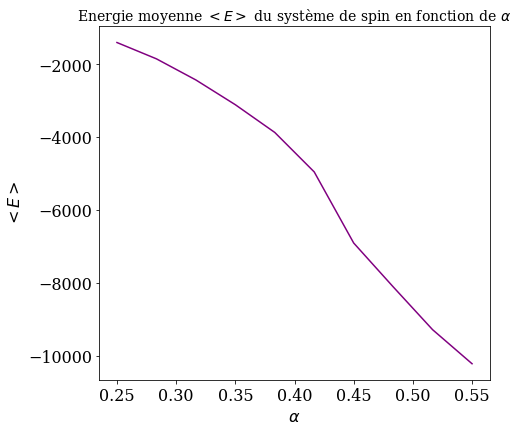

In [44]:
pyplot.figure(figsize=(7,6.5))
pyplot.plot(alpha,xx, color='purple')
pyplot.title(r'Energie moyenne $<E>$ du système de spin en fonction de $\alpha$', fontsize=14) 
pyplot.xlabel(r'$\alpha$')
pyplot.ylabel(r'$<E>$')

La forme caractéristique en "S" des transitions de phase est clairement visible. En observant ce graphique, on peut nettement voir qu'il y a diminution de l'énergie moyenne du système de spins lorsque $\alpha$ augmente, c'est à dire lorsque la température diminue. En effet, dans ce cas-ci, si on diminue assez la température (en dessous de $T_c$), on entre dans le régime ferromagnétique : l'énergie est minimisée lorsque tous les spins sont allignés. Et inversément, l'énergie augmente lorsque l'on passe du régime ferromagnétique à paramagnétique. 

Remarquons aussi que pour $<E>$ en fonction de $\alpha$, la transition n'est pas nette : il n'y pas un changement brusque d'énergie d'une phase à une autre contrairement au cas de la magnétisation moyenne $<M>$ en fonction de $\alpha$. 

On peut également estimer la constante de couplage critique $\alpha_c$ à partir du point d'inflexion de ce graphe : $\alpha_c \approx 0.425$.

### **Solution exacte de Onsager pour le paramètre critique de transition de phase $\alpha_c$ :** 

On peut calculer théoriquement la constante de couplage critique pour une configuration de réseau de spins carrée (avec conditions aux bords périodiques) avec comme condition initiale des spins *ups* partout, en l'absence de champ magnétique extérieur. Ce calcul a été fait par Lars Onsager en 1944. Le résultat est le suivant (référence : https://en.wikipedia.org/wiki/Square-lattice_Ising_model) : 

$$\alpha_c = \frac{J}{k_b T} = \frac{\ln(1+\sqrt{2})}{2} = 0.440687$$

### **Discussion des résultats obtenus**

En considérant $<M>$ en fonction de $\alpha$, et $<E>$ en fonction de $\alpha$, on obtient des valeurs $\alpha_c$ qui sont très proches : $\alpha_c \approx 0.42$. Cependant, en comparant avec la solution théorique de Onsager, on voit qu'il y a un léger écart (de l'ordre de $0.02$). 

Cela est très certainement dû à notre nombre d'itérations très peu élevé. Effectivement, pour chaque $\alpha$ nous ne générons que très peu d'états par l'algorithme de Metropolis ($NMC + 1 = 251$). Ce nombre d'itérations n'est clairement pas assez pour que la séquence d'états converge exactement vers un état d'équilibre thermodynamique. Et donc les moyennes statistiques sont éronnées par le fait que la séquence d'états n'a pas encore atteint un état stationnaire. On pourrait augmenter le nombre d'itérations, au détriment du temps de calcul qui deviendrait beaucoup trop long pour nos machines utilisées. 

## **2)**  
Pour ce deuxième calcul, nous allons considérer initialement un matériau ferromagnétique dans lequel tous les spins sont orientés *up* sur le bord, et aléatoirement dans le réseau. Le réseau est toujours composé de 10000 dipôles et nous allons générer des séquences d'états pour des valeurs de $\alpha$ comprises entre $0$ et $1$. 

In [45]:
nbr=10
alpha = numpy.linspace(0.,1.,nbr)
nx = 100
ny = 100

#On créé notre état initial de spin aleatoire sauf aux bords où ils sont tous "ups"
sp = initial_state(nx,ny)                 
sp[0,:]=1
sp[-1,:]=1
sp[:,0]=1
sp[:,-1]=1

NMC=250
etat = numpy.ones([nbr, NMC + 1, nx, ny])
for i, alphavaleur in enumerate(alpha):

    etat[i]= ising_model_metropolis(sp.copy(), NMC, nx, ny, alpha[i])

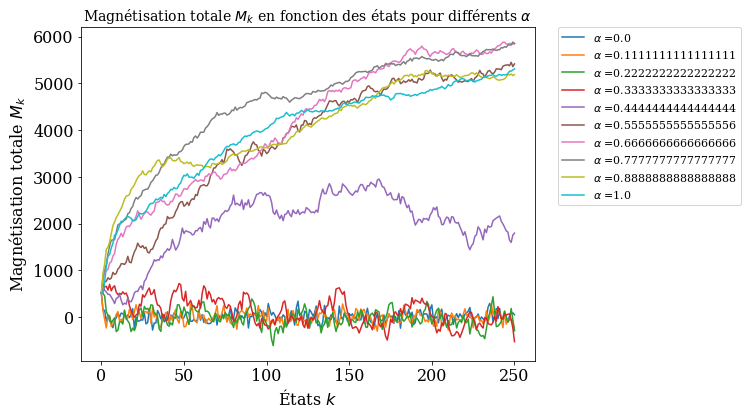

In [46]:
pyplot.figure(figsize=(7.5,5.5))
for i,alphavaleur in enumerate(alpha):
    pyplot.plot(etat[i].sum(axis=(1,2)), label= r'$\alpha$ ={0:1}'.format(alpha[i]))
    
pyplot.legend(fontsize=11, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pyplot.tight_layout()
pyplot.title(r'Magnétisation totale $M_k$ en fonction des états pour différents $\alpha$', fontsize=14)
pyplot.xlabel(r'États $k$')
pyplot.ylabel(r'Magnétisation totale $M_k$')

### $\bullet$ Magnétisation moyenne $<M>$ en fonction de $\alpha$ : 

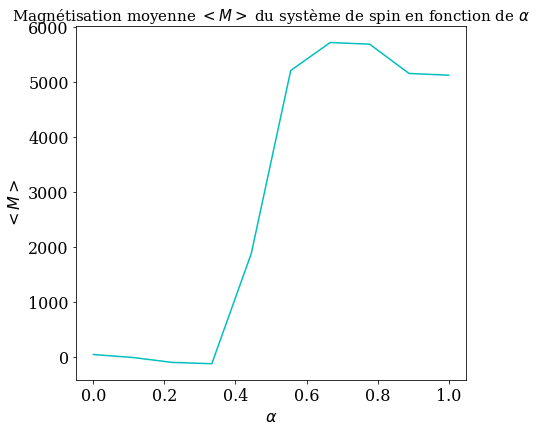

In [49]:
#Calcul de <M> pour chaque alpha et représentation graphique

a = 210                                           #faire la moyenne pour les 40 derniers états
y = numpy.zeros(nbr)                              #tableau qui stocke les moyennes <M>
for i in range(nbr):                              #Calcul de Mk
    for j in range (a,NMC+1):
          y[i] = y[i] + numpy.sum(etat[i,j,:,:])
            
y = y/(NMC + 1 - a)                               #Calcul de <M>

pyplot.figure(figsize=(7,6.5))
pyplot.plot(alpha,y, color='c')
pyplot.title(r'Magnétisation moyenne $<M>$ du système de spin en fonction de $\alpha$', fontsize=15)
pyplot.xlabel(r'$\alpha$')
pyplot.ylabel(r'$<M>$')

Ici, on observe un comportement assez différent du cas précédent. En évaluant l'algorithme de Metropolis plusieur fois, on remarque des comportements très différents de $<M>$ pour chacune des évaluations. Il est dès lors difficile d'interpéter ces résultats, sachant que l'aléatoire est omniprésent, tant dans les conditions initiales que dans l'algorithme. Cependant, on peut toujours en tirer un comportement global : La magnétisation est nulle pour $\alpha$ proche de 0, et augmente pour des valeurs supérieures de $\alpha$. Remarquons aussi que pour l'intervalle $[0,1]$, la magnétisation n'atteint pas encore sa valeur maximale (10000), le matériau n'est donc pas encore totalement magnétisé. 

### $\bullet$ Energie moyenne $<E>$ en fonction de $\alpha$ : 

In [50]:
#élément permettant de stocker toutes les contributions d'énergies dues à chaque spin. 
energy = numpy.ones([nbr, NMC + 1, nx, ny])    
a=210
xx = numpy.zeros(nbr)
for i in range(nbr):
    for j in range(NMC+1):
        for k in range(nx):
            for l in range(ny):
                energy[i,j,k,l]= energy_at_site(etat[i,j,:,:], alpha[i], etat[i,j,k,l], k, l)
    for l in range(a,NMC+1):
        
        xx[i] = xx[i] + numpy.sum(energy[i,l,:,:])

xx = xx/(2*(NMC + 1 - a))

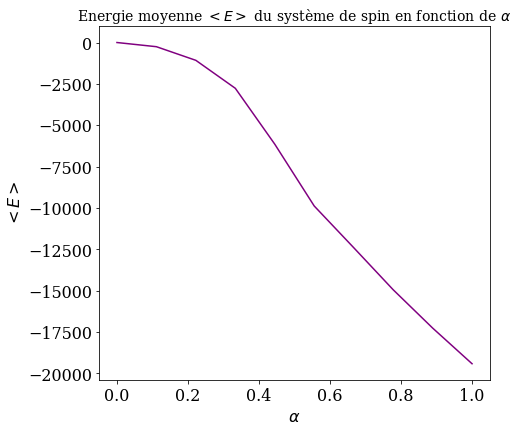

In [51]:
pyplot.figure(figsize=(7,6.5))
pyplot.plot(alpha,xx, color='purple')
pyplot.title(r'Energie moyenne $<E>$ du système de spin en fonction de $\alpha$', fontsize=14) 
pyplot.xlabel(r'$\alpha$')
pyplot.ylabel(r'$<E>$')

Encore une fois, la forme caractéristique d'une transition de phase est clairement visible. Il y a encore diminution de l'énergie moyenne du système de spins lorsque $\alpha$ augmente, et inversément. 

On peut encore estimer la constante de couplage critique $\alpha_c$ à partir du point d'inflexion de ce graphe : $\alpha_c \approx 0.6$.

### **Discussion des résultats obtenus**

On voit qu'il est également possible d'établir une constante de couplage critique pour la condition initiale choisie ici grâce au graphique d'énergie moyenne $<E>$ : $\alpha_c \approx 0.6$. Il est cependant plus compliqué d'évaluer $\alpha_c$ avec le graphe d'aimentation moyenne $<M>$. 

Des problèmes d'imprécisions peuvent encore surevenir à cause du nombre peu conséquent d'itérations.  

### **Conclusion**

Le modèle d'Ising muni de l'algorithme de Metropolis permet de simuler correctement la transition de phase paramagnétique/ferromagnétique d'un matériau fictif et d'en déduire sa température de transition de phase $T_c$. 

# **CONCLUSION DU TRAVAIL**

Tout au long de ce travail, nous nous sommes intéressés aux processus aléatoires en lien avec la physique statistique. Tout d'abord, on s'est familiarisé avec les générateurs de nombres aléatoires, on a modélisé le mouvement Brownien pour différents modèles de marche aléatoire, et finalement, on a étudié le modèle d'Ising en toute généralité, et avons étudié la transition ferromagnétique/paramagnétique.

